In [ ]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=beb2ba8169b928c0ac73d57e87195ed4b7950b1d0c47b65c13fcdb4c2a83055f
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload your CSV file


Saving sales_data.csv to sales_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('sales_data.csv')
print(df.head())


   OrderID     Product Category  Quantity  Price   OrderDate
0        1     T-shirt  Apparel         5     20  01/05/2023
1        2       Jeans  Apparel         3     50  02/05/2023
2        3  Coffee Mug     Home        10      8  03/05/2023
3        4    Notebook   Office         7      5  04/05/2023
4        5      Hoodie  Apparel         2     35  05/05/2023


In [ ]:
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('sales_data', conn, index=False, if_exists='replace')


7

In [ ]:
import pandas as pd

query = "SELECT * FROM sales_data"
result_df = pd.read_sql_query(query, conn)
print(result_df)


   OrderID     Product Category  Quantity  Price   OrderDate
0        1     T-shirt  Apparel         5     20  01/05/2023
1        2       Jeans  Apparel         3     50  02/05/2023
2        3  Coffee Mug     Home        10      8  03/05/2023
3        4    Notebook   Office         7      5  04/05/2023
4        5      Hoodie  Apparel         2     35  05/05/2023
5        6         Pen   Office        15      2  06/05/2023
6        7   Desk Lamp     Home         1     45  07/05/2023


In [ ]:
query = """
SELECT OrderID, Product, Quantity, Price, (Quantity * Price) AS Revenue
FROM sales_data
"""
result_df = pd.read_sql_query(query, conn)
print(result_df)


   OrderID     Product  Quantity  Price  Revenue
0        1     T-shirt         5     20      100
1        2       Jeans         3     50      150
2        3  Coffee Mug        10      8       80
3        4    Notebook         7      5       35
4        5      Hoodie         2     35       70
5        6         Pen        15      2       30
6        7   Desk Lamp         1     45       45


/tmp/ipython-input-12-676370283.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='Category', y='Revenue', palette='viridis')


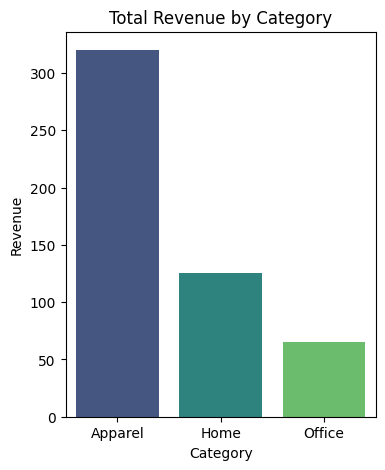

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # optional, for nicer styles
# Calculate revenue column
df['Revenue'] = df['Quantity'] * df['Price']

# Group by Category and sum revenue
category_revenue = df.groupby('Category')['Revenue'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(4,5))
sns.barplot(data=category_revenue, x='Category', y='Revenue', palette='viridis')
plt.title('Total Revenue by Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.show()


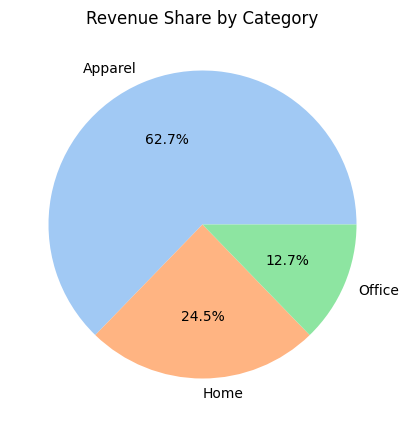

In [14]:
plt.figure(figsize=(5,5))
plt.pie(category_revenue['Revenue'], labels=category_revenue['Category'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Revenue Share by Category')
plt.show()
